<a href="https://colab.research.google.com/github/imran201khan/MachineLearning-from-Basic-/blob/main/Hnadling_Missing_Data_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day35-complete-case-analysis/data_science_job.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [3]:
df.shape

(19158, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [5]:
df.describe()

,enrollee_id,city_development_index,experience,training_hours,target
count,19158.000000,18679.000000,19093.000000,18392.000000,19158.000000
mean,16875.358179,0.828951,9.928036,65.185787,0.249348
std,9616.292592,0.123334,6.505268,59.885626,0.432647
min,1.000000,0.448000,0.000000,1.000000,0.000000
25%,8554.250000,0.740000,4.000000,23.000000,0.000000
50%,16982.500000,0.903000,9.000000,47.000000,0.000000
75%,25169.750000,0.920000,16.000000,88.000000,0.000000
max,33380.000000,0.949000,20.000000,336.000000,1.000000


In [6]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [10]:
cols=[var for var in df.columns if((df[var].isnull()).mean()<0.05 and df[var].isnull().mean()>0)]

In [11]:
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [13]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
988,0.920,no_enrollment,Graduate,10.0,67.0
6397,0.624,no_enrollment,Graduate,11.0,41.0
13813,0.924,Full time course,High School,3.0,103.0
7454,0.776,no_enrollment,NaN,2.0,47.0
4418,0.939,no_enrollment,Graduate,5.0,18.0


In [14]:
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [15]:
len(df[cols].dropna())/len(df)

0.8968577095730244

In [16]:
new_df=df[cols].dropna()

In [17]:
df.shape,new_df.shape

((19158, 13), (17182, 5))

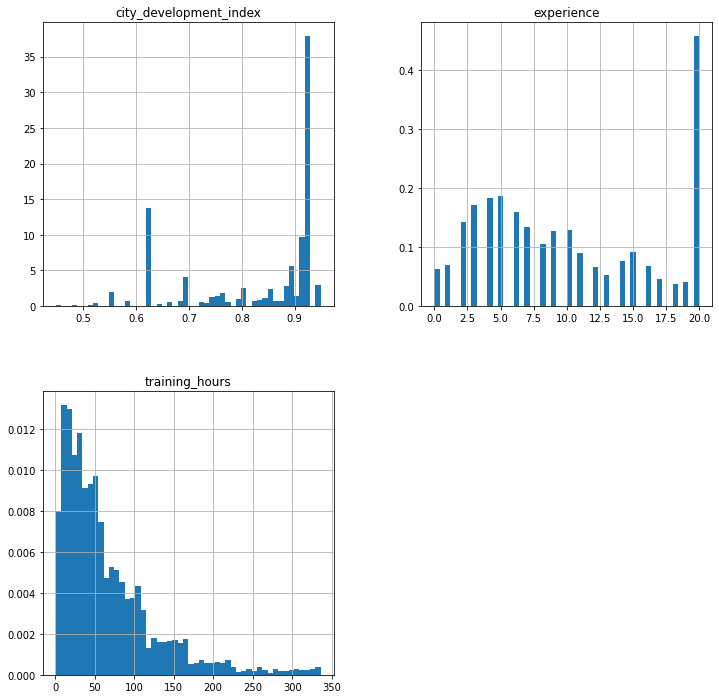

In [19]:
new_df.hist(bins=50,density=True,figsize=(12,12))
plt.show()

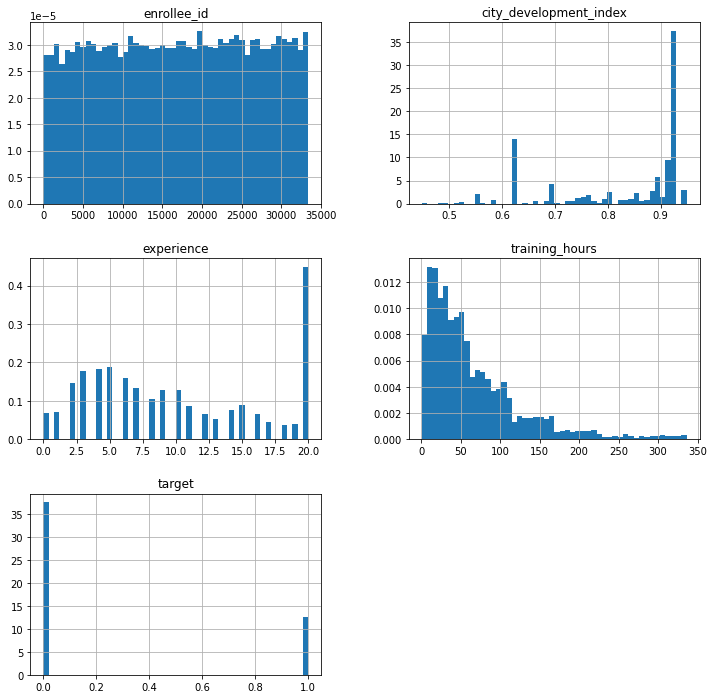

In [21]:
df.hist(bins=50,density=True,figsize=(12,12))
plt.show()

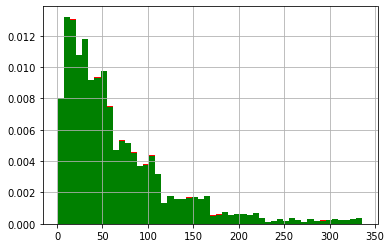

In [27]:
fig=plt.figure()
ax=fig.add_subplot(111)
#original data
df['training_hours'].hist(bins=50,density=True,ax=ax,color='red')
# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50,density=True,ax=ax,color='green')

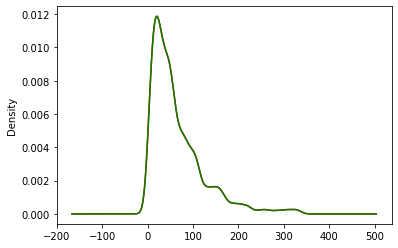

In [26]:
fig=plt.figure()
ax=fig.add_subplot()
#original data
df['training_hours'].plot.density(color='red')
#after
new_df['training_hours'].plot.density(color='green')

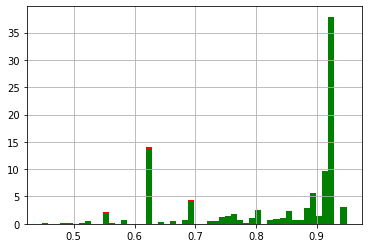

In [29]:
fig=plt.figure()
ax=fig.add_subplot(111)
#original data
df['city_development_index'].hist(bins=50,density=True,ax=ax,color='red')
# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['city_development_index'].hist(bins=50,density=True,ax=ax,color='green')

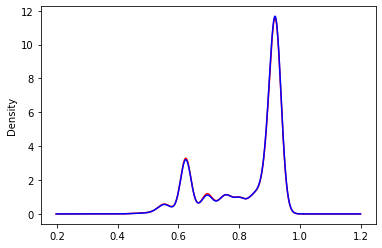

In [31]:
fig=plt.figure()
ax=fig.add_subplot(111)
#original
df['city_development_index'].plot.density(color='red')
#after remove missing value
new_df['city_development_index'].plot.density(color='blue')

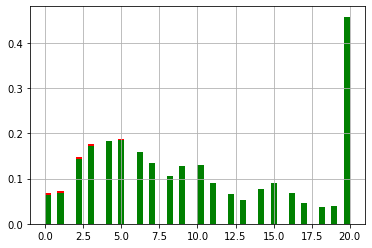

In [34]:
fig=plt.figure()
ax=fig.add_subplot(111)
#original data
df['experience'].hist(bins=50,density=True,ax=ax,color='red')
# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50,density=True,ax=ax,color='green')

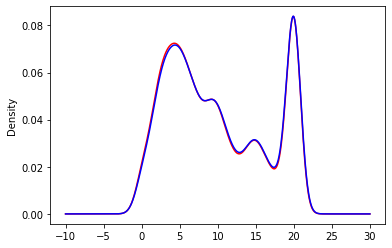

In [38]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['experience'].plot.density(color='red')
new_df['experience'].plot.density(color='blue')

In [39]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [40]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
